Wine Quality Model_Decision Tree ML Model

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report, roc_auc_score , roc_curve

In [4]:
pwd

'C:\\Users\\amiglani\\OneDrive - Fortrea Inc\\LM activities\\Alok General Folder\\Artificial Intelligence\\Final Folder\\Original files\\08_Supervised Machine Learning\\03_Decision Tree-Random Forest'

In [5]:
df=pd.read_csv("winequality_red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [14]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.shape

(1599, 12)

In [16]:
df.duplicated().sum()

240

In [15]:
df.drop_duplicates(inplace=True)


In [20]:
df.shape

(1359, 12)

In [16]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


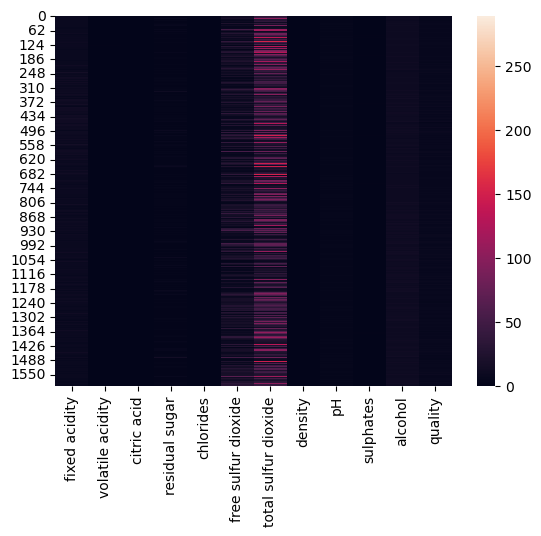

In [6]:
sns.heatmap(df,label=df.columns)
plt.show()

In [17]:
df["quality"].value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

In [18]:
set(df.quality)

{3, 4, 5, 6, 7, 8}

In [19]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
x=df[cols]
y=df["quality"]

In [7]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [8]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [9]:
x.shape

(1599, 11)

In [10]:
y.shape

(1599,)

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=30)

In [12]:
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1178,5.6,0.915,0.00,2.1,0.041,17.0,78.0,0.99346,3.68,0.73,11.4
1189,8.8,0.955,0.05,1.8,0.075,5.0,19.0,0.99616,3.30,0.44,9.6
161,7.6,0.680,0.02,1.3,0.072,9.0,20.0,0.99650,3.17,1.08,9.2
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.99690,3.21,0.69,9.3
961,7.1,0.560,0.14,1.6,0.078,7.0,18.0,0.99592,3.27,0.62,9.3


In [13]:
x_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1147,10.0,0.410,0.45,6.2,0.071,6.0,14.0,0.99702,3.21,0.49,11.8
659,7.1,0.840,0.02,4.4,0.096,5.0,13.0,0.99700,3.41,0.57,11.0
871,6.9,0.560,0.03,1.5,0.086,36.0,46.0,0.99522,3.53,0.57,10.6
1333,9.1,0.775,0.22,2.2,0.079,12.0,48.0,0.99760,3.18,0.51,9.6
1411,6.4,0.470,0.40,2.4,0.071,8.0,19.0,0.99630,3.56,0.73,10.6


In [14]:
y_train.head()

1178    5
1189    4
161     4
109     5
961     5
Name: quality, dtype: int64

In [15]:
y_test.head()

1147    7
659     4
871     5
1333    5
1411    6
Name: quality, dtype: int64

In [16]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)


DecisionTreeClassifier()

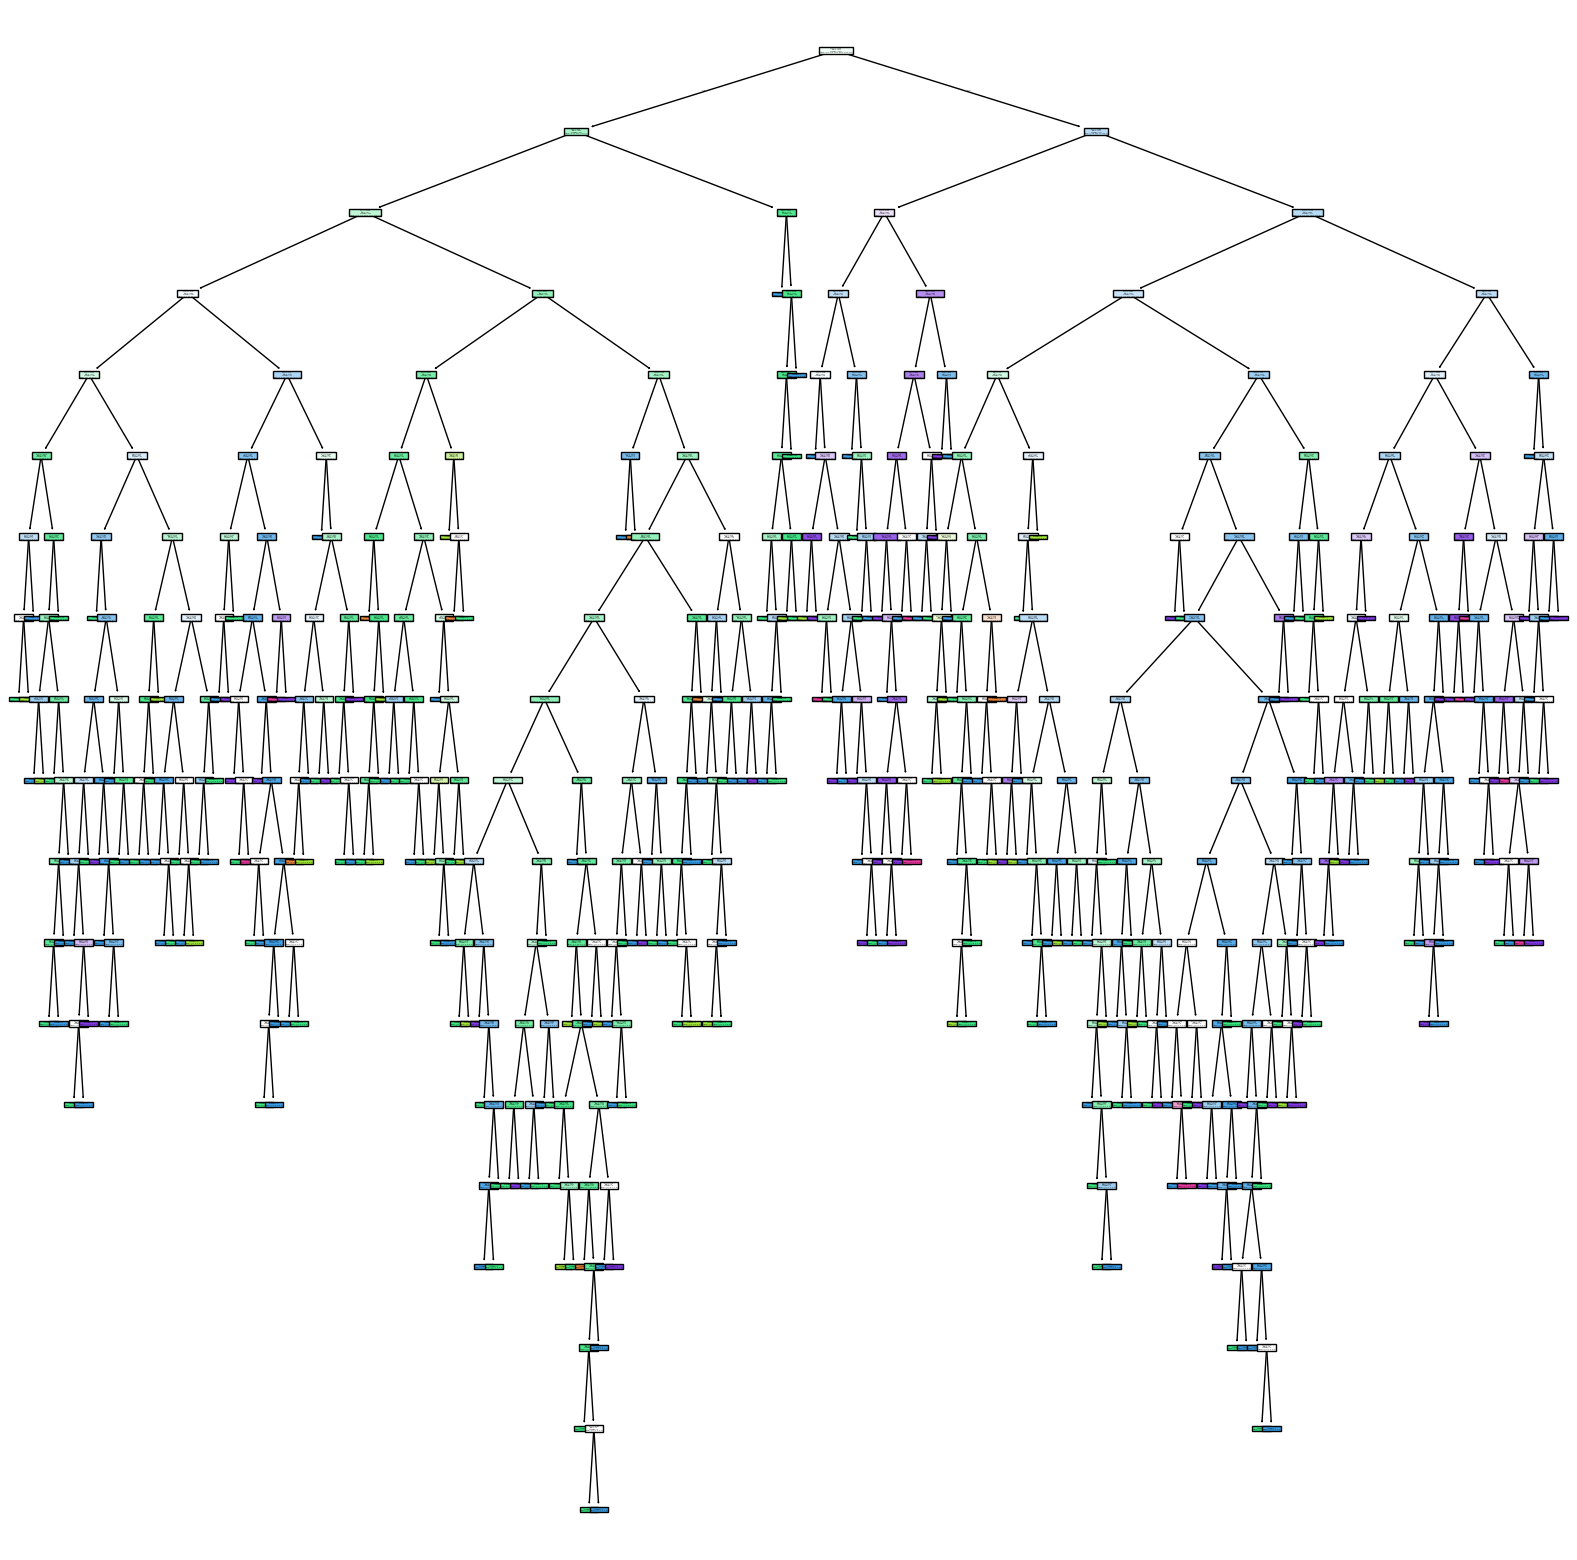

In [49]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model,filled=True)
plt.show()

In [17]:
df1=df.head(40)
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [18]:
x1=df1[cols]
y1=df1["quality"]

In [66]:
x1.head(40)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [20]:
dt_model1=DecisionTreeClassifier()
dt_model1.fit(x1,y1)

DecisionTreeClassifier()

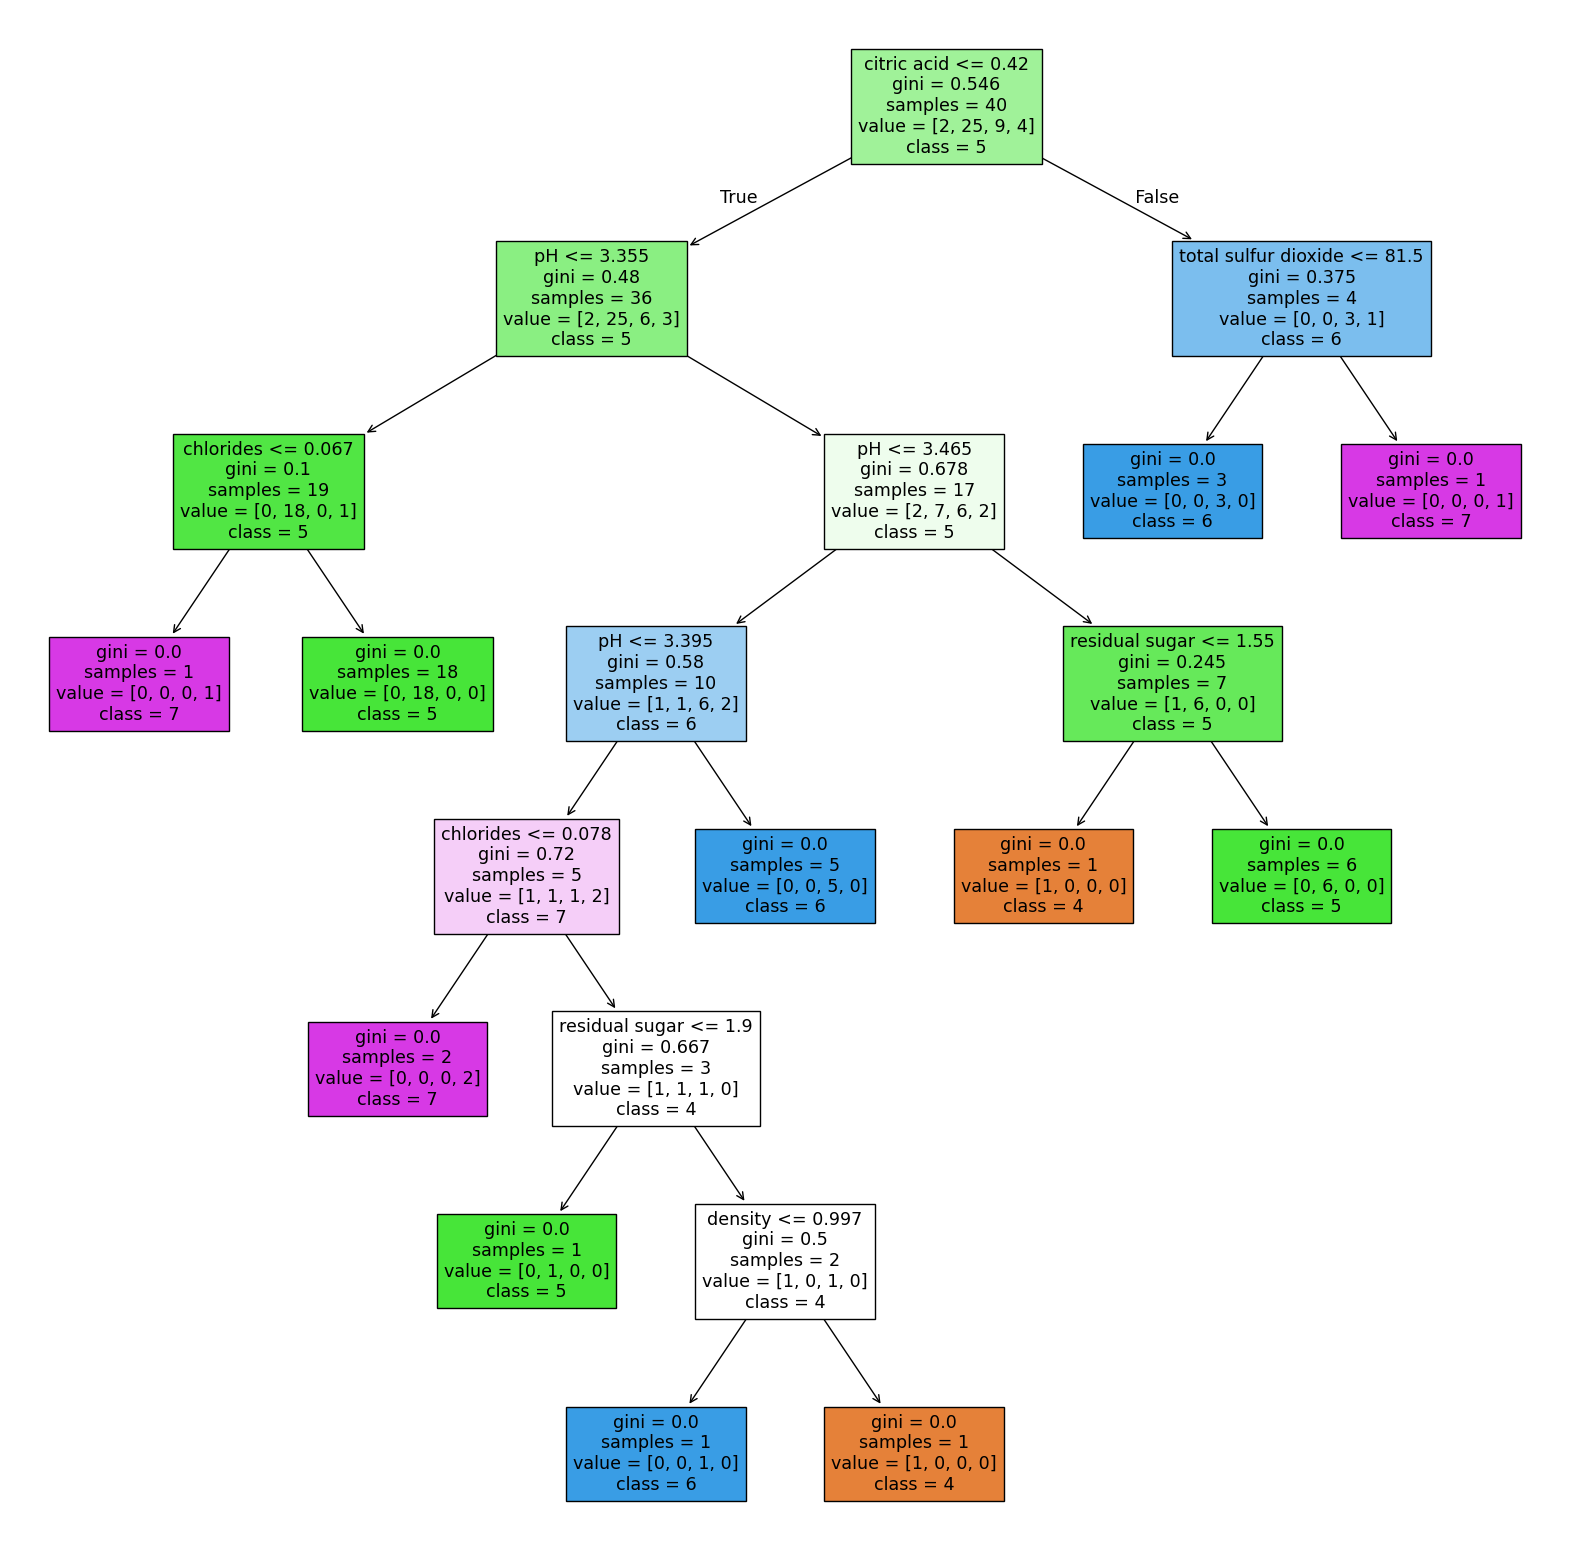

In [67]:
feature_names = list(x1.columns)
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model1, filled=True, class_names=[str(i) for i in set(y1)], feature_names=feature_names)
plt.show()


In [68]:
set(y1)

{4, 5, 6, 7}

In [25]:
[str(i) for i in set(y1)]

['4', '5', '6', '7']

In [69]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [31]:
y_train_predict=dt_model.predict(x_train)
y_test_predict=dt_model.predict(x_test)

In [70]:
accuracy_score(y_train,y_train_predict)

1.0

In [72]:
accuracy_score(y_test,y_test_predict)

0.625

In [73]:
dt_model.score(x_train,y_train)

1.0

In [74]:
dt_model.score(x_test,y_test)

0.625

In [75]:
path=dt_model.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha=path.ccp_alphas
path

{'ccp_alphas': array([0.        , 0.00069502, 0.00072977, 0.00074136, 0.00076453,
        0.00076731, 0.00077445, 0.00077445, 0.00078497, 0.00079013,
        0.00079013, 0.00079431, 0.00080067, 0.00080541, 0.00081086,
        0.00083403, 0.00083403, 0.00083403, 0.00083403, 0.00083403,
        0.00083403, 0.00083403, 0.00083403, 0.00083403, 0.00083403,
        0.00083403, 0.00083403, 0.00083403, 0.00083403, 0.00083403,
        0.00083403, 0.00083403, 0.00083403, 0.00083403, 0.00083403,
        0.00083403, 0.00083403, 0.00104254, 0.00104254, 0.00104254,
        0.00111204, 0.00111204, 0.00111204, 0.00111204, 0.00111204,
        0.00111204, 0.00111204, 0.00111204, 0.00115065, 0.00116476,
        0.00117619, 0.00123641, 0.00125104, 0.00125104, 0.00125104,
        0.00125104, 0.00125104, 0.00125104, 0.00125104, 0.00125104,
        0.00125104, 0.00125104, 0.00125104, 0.00125104, 0.00125104,
        0.00127822, 0.00129813, 0.00131062, 0.00131062, 0.00132128,
        0.00132205, 0.00133152, 0.

In [76]:
ccp_alpha

array([0.        , 0.00069502, 0.00072977, 0.00074136, 0.00076453,
       0.00076731, 0.00077445, 0.00077445, 0.00078497, 0.00079013,
       0.00079013, 0.00079431, 0.00080067, 0.00080541, 0.00081086,
       0.00083403, 0.00083403, 0.00083403, 0.00083403, 0.00083403,
       0.00083403, 0.00083403, 0.00083403, 0.00083403, 0.00083403,
       0.00083403, 0.00083403, 0.00083403, 0.00083403, 0.00083403,
       0.00083403, 0.00083403, 0.00083403, 0.00083403, 0.00083403,
       0.00083403, 0.00083403, 0.00104254, 0.00104254, 0.00104254,
       0.00111204, 0.00111204, 0.00111204, 0.00111204, 0.00111204,
       0.00111204, 0.00111204, 0.00111204, 0.00115065, 0.00116476,
       0.00117619, 0.00123641, 0.00125104, 0.00125104, 0.00125104,
       0.00125104, 0.00125104, 0.00125104, 0.00125104, 0.00125104,
       0.00125104, 0.00125104, 0.00125104, 0.00125104, 0.00125104,
       0.00127822, 0.00129813, 0.00131062, 0.00131062, 0.00132128,
       0.00132205, 0.00133152, 0.00133445, 0.00133445, 0.00133

In [77]:
dt_model2=[]
for ccp in ccp_alpha:
    dt_m=DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(x_train,y_train)
    dt_model2.append(dt_m)

In [78]:
dt_model2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.0006950236308034474),
 DecisionTreeClassifier(ccp_alpha=0.0007297748123436197),
 DecisionTreeClassifier(ccp_alpha=0.000741358539523677),
 DecisionTreeClassifier(ccp_alpha=0.0007645259938837922),
 DecisionTreeClassifier(ccp_alpha=0.0007673060884070058),
 DecisionTreeClassifier(ccp_alpha=0.0007744549028952701),
 DecisionTreeClassifier(ccp_alpha=0.0007744549028952701),
 DecisionTreeClassifier(ccp_alpha=0.0007849678653780112),
 DecisionTreeClassifier(ccp_alpha=0.0007901321276502352),
 DecisionTreeClassifier(ccp_alpha=0.0007901321276502352),
 DecisionTreeClassifier(ccp_alpha=0.0007943127209182258),
 DecisionTreeClassifier(ccp_alpha=0.0008006672226855711),
 DecisionTreeClassifier(ccp_alpha=0.0008054097368722303),
 DecisionTreeClassifier(ccp_alpha=0.0008108609026040222),
 DecisionTreeClassifier(ccp_alpha=0.0008340283569641367),
 DecisionTreeClassifier(ccp_alpha=0.0008340283569641367),
 DecisionTreeClassifier(ccp_alpha=0.0008340283

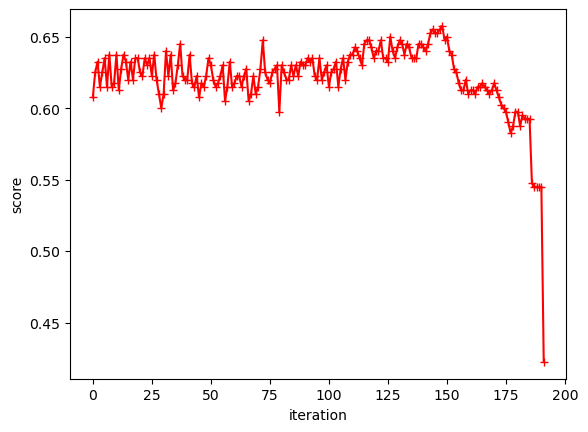

In [79]:
dt_model2 = []
score = []
for i in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha = i)
    dt_m.fit(x_train,y_train)
    dt_model2.append(dt_m)
    score.append(dt_m.score(x_test, y_test))

    
plt.plot(score, 'r-+')
plt.xlabel('iteration')
plt.ylabel('score')
plt.show()

In [80]:
dt_model2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.0006950236308034474),
 DecisionTreeClassifier(ccp_alpha=0.0007297748123436197),
 DecisionTreeClassifier(ccp_alpha=0.000741358539523677),
 DecisionTreeClassifier(ccp_alpha=0.0007645259938837922),
 DecisionTreeClassifier(ccp_alpha=0.0007673060884070058),
 DecisionTreeClassifier(ccp_alpha=0.0007744549028952701),
 DecisionTreeClassifier(ccp_alpha=0.0007744549028952701),
 DecisionTreeClassifier(ccp_alpha=0.0007849678653780112),
 DecisionTreeClassifier(ccp_alpha=0.0007901321276502352),
 DecisionTreeClassifier(ccp_alpha=0.0007901321276502352),
 DecisionTreeClassifier(ccp_alpha=0.0007943127209182258),
 DecisionTreeClassifier(ccp_alpha=0.0008006672226855711),
 DecisionTreeClassifier(ccp_alpha=0.0008054097368722303),
 DecisionTreeClassifier(ccp_alpha=0.0008108609026040222),
 DecisionTreeClassifier(ccp_alpha=0.0008340283569641367),
 DecisionTreeClassifier(ccp_alpha=0.0008340283569641367),
 DecisionTreeClassifier(ccp_alpha=0.0008340283

In [81]:
train_score = [i.score(x_train,y_train) for i in dt_model2]

In [82]:
test_score = [i.score(x_test ,y_test) for i in dt_model2]

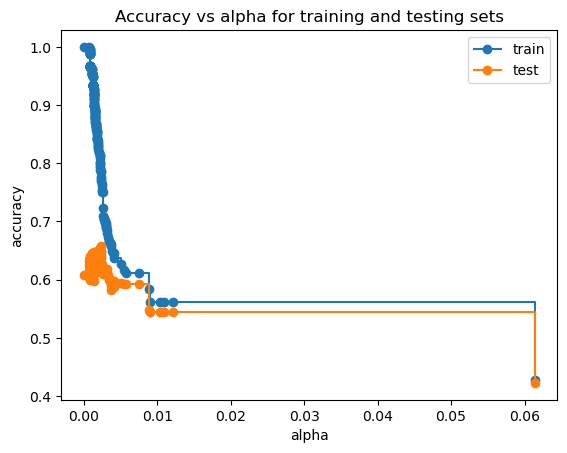

In [83]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alpha, train_score, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alpha, test_score, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [84]:
dt_model_ccp = DecisionTreeClassifier(random_state=0 , ccp_alpha=.009)
dt_model_ccp.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.009, random_state=0)

In [85]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model_ccp,filled=True)

[Text(0.5, 0.875, 'x[10] <= 10.35\ngini = 0.642\nsamples = 1199\nvalue = [8, 35, 512, 477, 153, 14]'),
 Text(0.3, 0.625, 'x[6] <= 95.5\ngini = 0.528\nsamples = 666\nvalue = [6.0, 20.0, 406.0, 209.0, 23.0, 2.0]'),
 Text(0.4, 0.75, 'True  '),
 Text(0.2, 0.375, 'x[9] <= 0.585\ngini = 0.554\nsamples = 584\nvalue = [6.0, 19.0, 332.0, 202.0, 23.0, 2.0]'),
 Text(0.1, 0.125, 'gini = 0.468\nsamples = 261\nvalue = [3, 14, 179, 63, 2, 0]'),
 Text(0.3, 0.125, 'gini = 0.586\nsamples = 323\nvalue = [3, 5, 153, 139, 21, 2]'),
 Text(0.4, 0.375, 'gini = 0.178\nsamples = 82\nvalue = [0.0, 1.0, 74.0, 7.0, 0.0, 0.0]'),
 Text(0.7, 0.625, 'x[10] <= 11.55\ngini = 0.647\nsamples = 533\nvalue = [2, 15, 106, 268, 130, 12]'),
 Text(0.6, 0.75, '  False'),
 Text(0.6, 0.375, 'gini = 0.629\nsamples = 356\nvalue = [2.0, 13.0, 96.0, 186.0, 55.0, 4.0]'),
 Text(0.8, 0.375, 'x[9] <= 0.685\ngini = 0.6\nsamples = 177\nvalue = [0, 2, 10, 82, 75, 8]'),
 Text(0.7, 0.125, 'gini = 0.537\nsamples = 95\nvalue = [0.0, 2.0, 8.0, 59

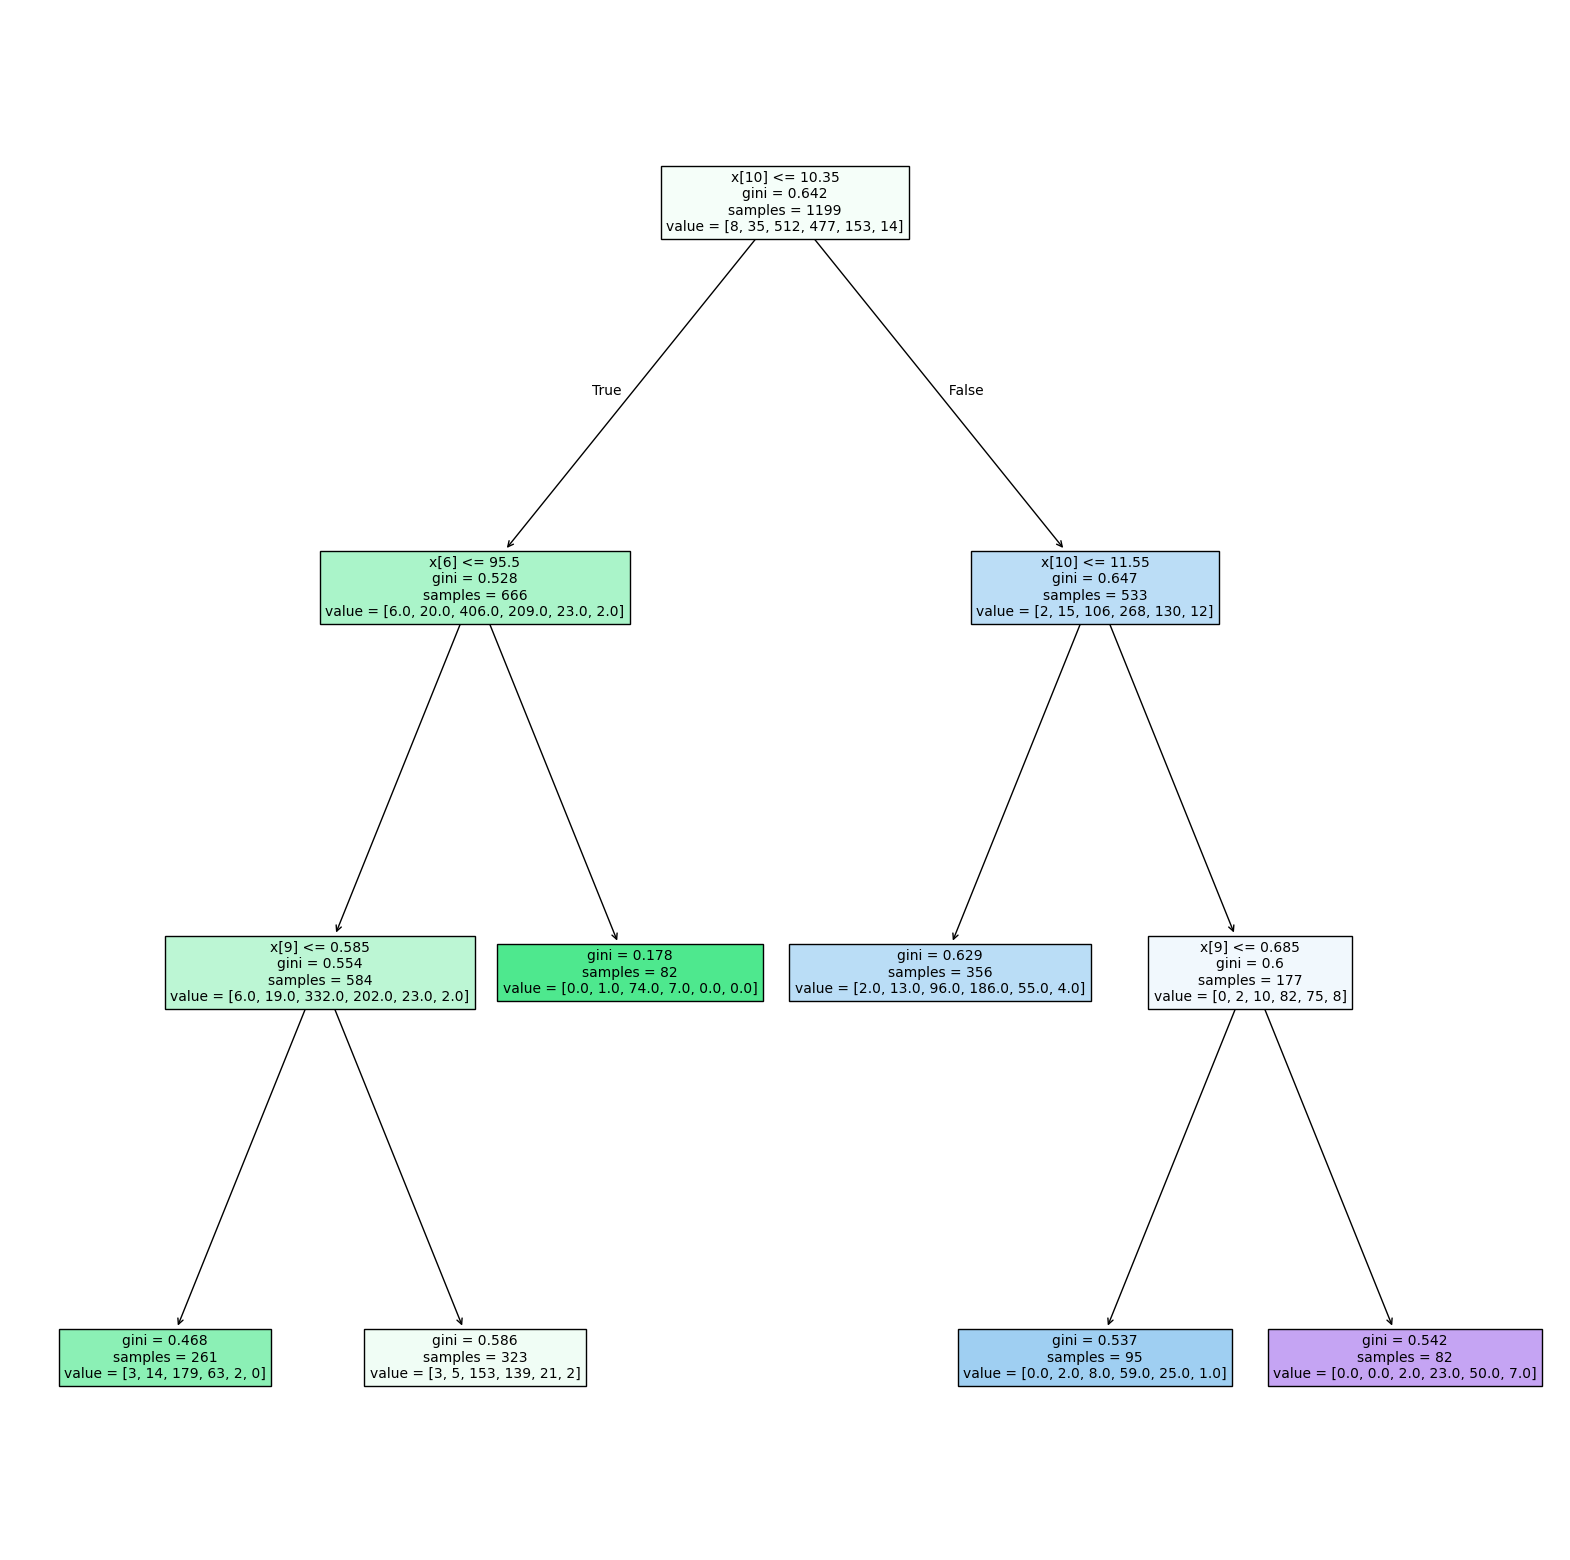

In [86]:
plt.show()

In [87]:
dt_model_ccp.score(x_train,y_train)

0.5846538782318599

In [88]:
dt_model.score(x_test,y_test)

0.625

In [94]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [95]:
grid_pram = {"criterion":['gini','entropy'],
             "splitter":['best','random'],
             "max_depth" : range(3,20,1),
             "min_samples_split":range(2,5 ,1),
             "min_samples_leaf":range(1,10,1)}

In [96]:
grid_ccp = GridSearchCV(estimator=dt_model_ccp,param_grid=grid_pram , cv = 10 , n_jobs=-1)

In [97]:
grid_ccp.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(ccp_alpha=0.009, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 20),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 5),
                         'splitter': ['best', 'random']})

In [93]:
grid_ccp.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'splitter': 'best'}

In [98]:
dt_cpp_new = DecisionTreeClassifier(criterion='entropy' , max_depth=7 ,min_samples_leaf=6 , min_samples_split=2 , splitter='best',ccp_alpha=0.009)

In [99]:
dt_cpp_new.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.009, criterion='entropy', max_depth=7,
                       min_samples_leaf=6)

In [100]:
dt_cpp_new.score(x_train,y_train)

0.6530442035029191

In [101]:
dt_cpp_new.score(x_test,y_test)

0.5925

In [102]:
y_train_predicted = dt_cpp_new.predict(x_train)
y_test_predicted = dt_cpp_new.predict(x_test)

In [103]:
confusion_matrix(y_train,y_train_predicted)

array([[  0,   0,   5,   3,   0,   0],
       [  0,   0,  28,   7,   0,   0],
       [  0,   0, 363, 139,  10,   0],
       [  0,   0, 102, 318,  57,   0],
       [  0,   0,   9,  42, 102,   0],
       [  0,   0,   0,   2,  12,   0]], dtype=int64)

In [105]:
report_test = classification_report(y_test, y_test_predicted)
print(report_test)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        18
           5       0.71      0.66      0.69       169
           6       0.56      0.60      0.58       161
           7       0.41      0.61      0.49        46
           8       0.00      0.00      0.00         4

    accuracy                           0.59       400
   macro avg       0.28      0.31      0.29       400
weighted avg       0.57      0.59      0.58       400



In [106]:
report_test = classification_report(y_train, y_train_predicted)
print(report_test)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        35
           5       0.72      0.71      0.71       512
           6       0.62      0.67      0.64       477
           7       0.56      0.67      0.61       153
           8       0.00      0.00      0.00        14

    accuracy                           0.65      1199
   macro avg       0.32      0.34      0.33      1199
weighted avg       0.63      0.65      0.64      1199



In [107]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_train_predicted = rf_model.predict(x_train)
y_test_predicted = rf_model.predict(x_test)

In [108]:
report_test_rf = classification_report(y_test, y_test_predicted)
print(report_test_rf)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        18
           5       0.74      0.79      0.76       169
           6       0.65      0.69      0.67       161
           7       0.55      0.61      0.58        46
           8       0.00      0.00      0.00         4

    accuracy                           0.68       400
   macro avg       0.32      0.35      0.34       400
weighted avg       0.64      0.68      0.66       400



In [109]:
report_train_rf = classification_report(y_train, y_train_predicted)
print(report_train_rf)

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00       512
           6       1.00      1.00      1.00       477
           7       1.00      1.00      1.00       153
           8       1.00      1.00      1.00        14

    accuracy                           1.00      1199
   macro avg       1.00      1.00      1.00      1199
weighted avg       1.00      1.00      1.00      1199

